In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/day20-1/train.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [3]:
df=pd.read_csv("/kaggle/input/day20-1/train.csv",usecols=["Age","Fare","Survived"])

In [4]:
df.dropna(inplace=True)

In [5]:
df.shape

(714, 3)

In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
X_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [10]:
clf=DecisionTreeClassifier()

In [11]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [12]:
accuracy_score(y_pred,y_test)

0.6293706293706294

In [13]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring="accuracy"))

0.6302816901408451

In [14]:
kbin_age=KBinsDiscretizer(n_bins=15,encode="ordinal",strategy="quantile")
kbin_fare=KBinsDiscretizer(n_bins=15,encode="ordinal",strategy="quantile")  

In [15]:
trf=ColumnTransformer([("first",kbin_age,[0]),
                      ("second",kbin_fare,[1])])

In [16]:
"""output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})"""

"output = pd.DataFrame({\n    'age':X_train['Age'],\n    'age_trf':X_train_trf[:,0],\n    'fare':X_train['Fare'],\n    'fare_trf':X_train_trf[:,1]\n})"

In [17]:
#output['age_labels'] = pd.cut(x=X_train['Age'],
                                    #bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
#output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    #bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [18]:
#output.sample(5)

In [19]:
X_train_trf=trf.fit_transform(X_train)
X_test_trf=trf.fit_transform(X_test)

In [20]:
trf.named_transformers_

{'first': KBinsDiscretizer(encode='ordinal', n_bins=15),
 'second': KBinsDiscretizer(encode='ordinal', n_bins=15)}

In [21]:
trf.named_transformers_["second"].n_bins_

array([15])

In [22]:
trf.named_transformers_["second"].bin_edges_

array([array([  0.        ,   7.17166667,   7.77333333,   7.925     ,
                8.05      ,   9.5       ,  10.5       ,  13.        ,
               17.69333333,  22.62      ,  26.35276667,  31.275     ,
               38.1       ,  53.22666667,  79.27666667, 512.3292    ])],
      dtype=object)

In [23]:
clf=DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2=clf.predict(X_test_trf)

In [24]:
accuracy_score(y_test,y_pred2)

0.6503496503496503

In [25]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()

0.6331181533646322


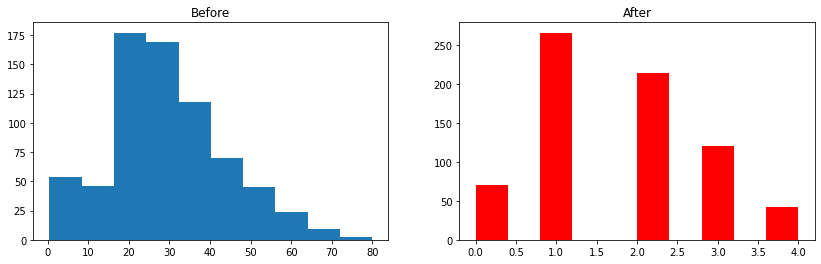

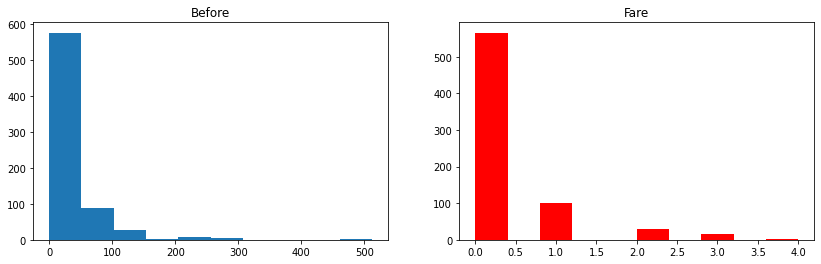

In [26]:
discretize(5,'kmeans')

# Custom based Binning

# Binarization

In [27]:
df=pd.read_csv("/kaggle/input/day20-1/train.csv",usecols=["Age","Fare","SibSp","Parch","Survived"])

In [28]:
df.dropna(inplace=True)

In [29]:
 df.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [30]:
df["Family"]=df["SibSp"]+df["Parch"]

In [31]:
df.head()

,Survived,Age,SibSp,Parch,Fare,Family
0,0,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,1
2,1,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,1
4,0,35.0,0,0,8.0500,0


In [32]:
df.drop(columns=["SibSp","Parch"],inplace=True)

In [33]:
df.head()

,Survived,Age,Fare,Family
0,0,22.0,7.2500,1
1,1,38.0,71.2833,1
2,1,26.0,7.9250,0
3,1,35.0,53.1000,1
4,0,35.0,8.0500,0


In [34]:
X=df.drop(columns=["Survived"])
y=df["Survived"]

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
X_train.head()

,Age,Fare,Family
328,31.0,20.5250,2
73,26.0,14.4542,1
253,30.0,16.1000,1
719,33.0,7.7750,0
666,25.0,13.0000,0


In [37]:
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.6223776223776224

In [38]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring="accuracy"))

0.6443075117370892

In [39]:
from sklearn.preprocessing import Binarizer

In [40]:
trf=ColumnTransformer([("Bin",Binarizer(copy=False),["Family"])],remainder="passthrough")

In [41]:
X_train_trf=trf.fit_transform(X_train)
X_test_trf=trf.fit_transform(X_test)

In [42]:
pd.DataFrame(X_train_trf,columns=["Family","Age","Fare"])

,Family,Age,Fare
0,1.0,31.0,20.5250
1,1.0,26.0,14.4542
2,1.0,30.0,16.1000
3,0.0,33.0,7.7750
4,0.0,25.0,13.0000
...,...,...,...
566,1.0,46.0,61.1750
567,0.0,25.0,13.0000
568,0.0,41.0,134.5000
569,1.0,33.0,20.5250


In [43]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

accuracy_score(y_test,y_pred2)

0.6363636363636364

In [44]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy'))

0.6317683881064162